### import libraries

In [5]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

### read data from csv files

In [69]:
train_path = "data/sign_mnist_train.csv"
test_path = "data/sign_mnist_test.csv"

train_pd = pd.read_csv(train_path)
test_pd = pd.read_csv(test_path)

print('train_pd data type   :', type(train_pd))
print("train_pd.shape       :", train_pd.shape)
print("test_pd.shape        :", test_pd.shape)

display(train_pd.head())


train_pd data type   : <class 'pandas.core.frame.DataFrame'>
train_pd.shape       : (27455, 785)
test_pd.shape        : (7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Convert data to numpy and shuffle

In [70]:
data_np = np.array(train_pd)
print('type(data_np)       :', type(data_np))
print('data_np.shape       :', data_np.shape)
m, n = data_np.shape
print('no. of examples:', m)
print('no. of features:', n)

# shuffle the data
np.random.shuffle(data_np)

type(data_np)       : <class 'numpy.ndarray'>
data_np.shape       : (27455, 785)
no. of examples: 27455
no. of features: 785


### split data to images and labels

In [112]:
labels_np = data_np[:, 0]
images_np = data_np[:, 1:n]
images_np = images_np / 255.

print('images.shape      :', images_np.shape)
print('labels.shape      :', labels_np.shape)

images.shape      : (27455, 784)
labels.shape      : (27455,)


In [113]:
if (images_np.shape[0]==labels_np.shape[0]):
    print('images and labels have same number of rows')

print(images_np[1,].shape)

images and labels have same number of rows
(784,)


### reshape data

In [114]:
# reshape each row  (784,) ---> (1, 28, 28)
reshaped = []
counter = 0
for img in images_np:
    reshaped.append(img.reshape((1, 28, 28)))
    counter += 1
images_np_reshaped = np.array(reshaped)

print(type(images_np_reshaped))
print(images_np_reshaped.shape)
print(images_np_reshaped[1,:,:,:].shape)

<class 'numpy.ndarray'>
(27455, 1, 28, 28)
(1, 28, 28)


In [116]:
images = torch.from_numpy(images_np_reshaped)
labels = torch.from_numpy(labels_np)
print('images type  :', type(images))
print('images.shape :', images.shape)
print('labels types :', type(labels))
print('labels.shape :', labels.shape)

images type  : <class 'torch.Tensor'>
images.shape : torch.Size([27455, 1, 28, 28])
labels types : <class 'torch.Tensor'>
labels.shape : torch.Size([27455])


### data balance check

In [131]:
print(np.unique(labels))
print('no. of unique values:', len(np.unique(labels)))
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 
10:0, 11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:0, 18:0, 
19:0, 20:0, 21:0, 22:0, 23:0, 24:0}
total = 0
for label in labels:
    counter_dict[int(label)] += 1
    total += 1

for i in counter_dict:
    print(f"{i}: {(counter_dict[i]/total)*100}")

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
no. of unique values: 24
0: 4.101256601711892
1: 3.6787470406119107
2: 4.1668184301584414
3: 4.356219267892915
4: 3.4857038790748494
5: 4.385357858313604
6: 3.9701329448187948
7: 3.6896740120196685
8: 4.23238025860499
10: 4.057548716080859
11: 4.520123839009288
12: 3.8426516117282823
13: 4.192314696776543
14: 4.356219267892915
15: 3.9628482972136228
16: 4.658532143507558
17: 4.713167000546348
18: 4.367146239300674
19: 4.319796029867056
20: 4.228737934802404
21: 3.940994354398106
22: 4.461846658167911
23: 4.239664906210162
24: 4.072118011291204


### Plot Some Examples

Label: 20


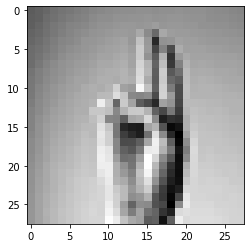

In [165]:
idx = 179

#plt.gray()
plt.imshow(images[idx,:].reshape((28,28)), interpolation='nearest')
plt.show

print("Label:", labels[idx].item())

0 : 0
1 : 0
2 : C
3 : 0
4 : ?
5 : F
6 : 0
7 : 0
8 : 0
9 : 0
10: R
11: L
12: 0
13: T
14: O o
15: P
16: Q
17: D
18: S
19: 0
20: 0
21: 0
22: W
23: 0
24: Y
25: 0